## **eCommerce Transactions Dataset EDA**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Load the all file:

customers=pd.read_csv('/content/Customers.csv')
products=pd.read_csv('/content/Products.csv')
transactions=pd.read_csv('/content/Transactions.csv')

In [35]:
#Check Data:
customers.head()



,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [36]:
products.head()


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [37]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# #Data UnderStanding###

In [38]:
#Check the data shape
print(customers.info())
print()
print(products.info())
print()
print(transactions.info())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ------------

In [39]:
#Check missing Value
print(customers.isnull().sum())
print()
print(products.isnull().sum())
print()
print(transactions.isnull().sum())
print()



CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64



In [40]:
#Check duplicate Value

print(customers.duplicated().sum())
print()
print(products.duplicated().sum())
print()
print(transactions.duplicated().sum())
print()


0

0

0



In [41]:
#Describe the transaction Table

round(transactions.describe()).T

,count,mean,std,min,25%,50%,75%,max
Quantity,1000.0,3.0,1.0,1.0,2.0,3.0,4.0,4.0
TotalValue,1000.0,690.0,493.0,16.0,295.0,589.0,1012.0,1991.0
Price,1000.0,273.0,141.0,16.0,148.0,300.0,404.0,498.0


## #Data Cleaning:

In [42]:
print(customers.head())
print()
print(products.head())
print()

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31



In [47]:
#Remove the time from TransactionDate column of transaction Table:

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionDate'] = transactions['TransactionDate'].dt.date


In [48]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [49]:
print(customers.head())
print()
print(transactions.head())
print()


  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15

  TransactionID CustomerID ProductID TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067      2024-08-25         1      300.68   
1        T00112      C0146      P067      2024-05-27         1      300.68   
2        T00166      C0127      P067      2024-04-25         1      300.68   
3        T00272      C0087      P067      2024-03-26         2      601.36   
4        T00363      C0070      P067      2024-03-21         3      902.04   

    Price  
0  300.68  
1  300.68  
2  300.68  
3  300.68  
4  300.68  



In [50]:
#Check the data shape
print(customers.info())
print()
print(products.info())
print()
print(transactions.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  

#Exploratory Analysis (Lets analyze all the file indivisual)

#customers file:

In [51]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


<ipython-input-65-e2c8c2e5aadd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set2')


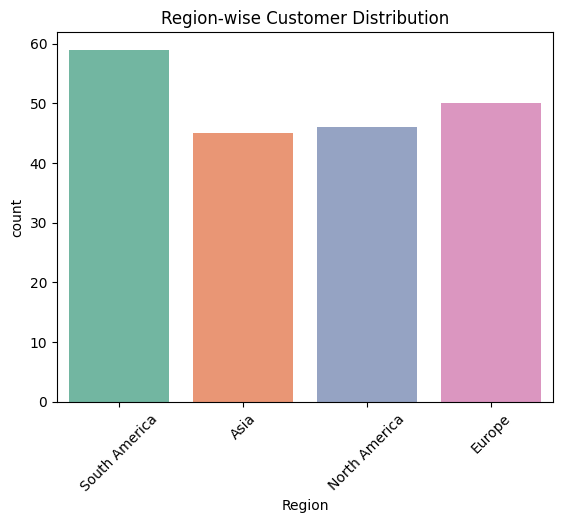

In [65]:
#Distributed region wise:

sns.countplot(data=customers, x='Region', palette='Set2')
plt.xticks(rotation=45)
plt.title("Region-wise Customer Distribution")
plt.show()


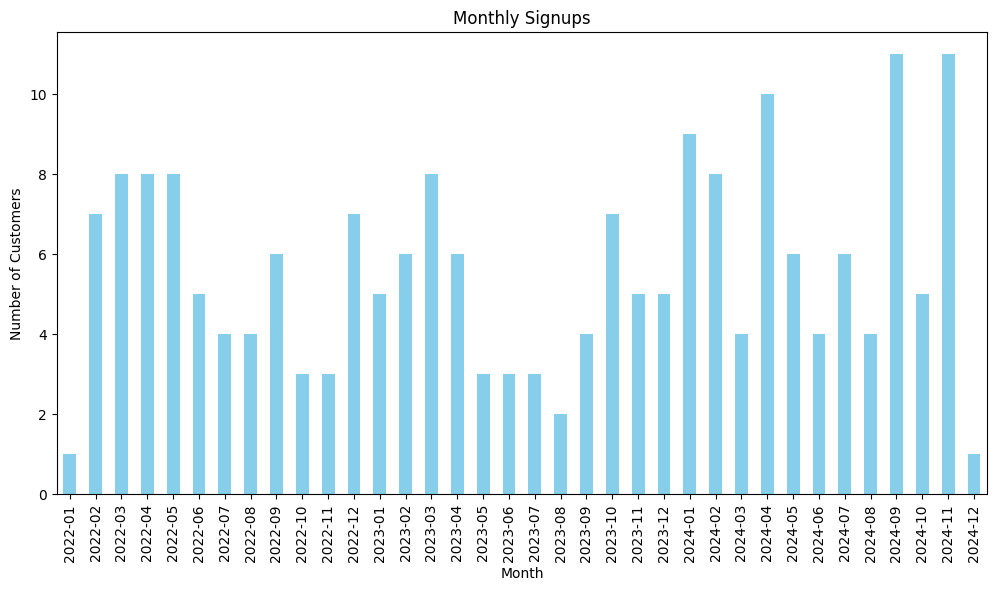

In [53]:
#Analysis by Signup date
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
monthly_signups = customers.groupby('SignupMonth').size()

monthly_signups.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Monthly Signups")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.show()


# From Product File:

<ipython-input-54-2fad0c645677>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='Set2')


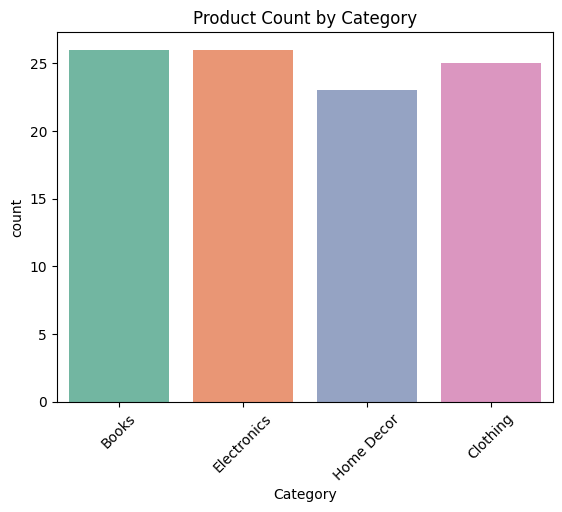

In [54]:
#Category_wise product count:

sns.countplot(data=products, x='Category', palette='Set2')
plt.title("Product Count by Category")
plt.xticks(rotation=45)
plt.show()


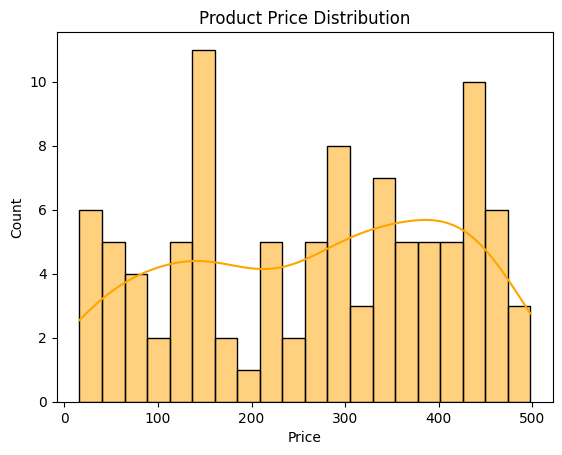

In [55]:
#price Distribution:
sns.histplot(products['Price'], bins=20, kde=True, color='orange')
plt.title("Product Price Distribution")
plt.show()


## Transactions File

In [57]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68


In [60]:
#calculate Toral revenue:

total_revenue = transactions['TotalValue'].sum()
print(f"Total Revenue: {total_revenue}")


Total Revenue: 689995.56


In [61]:
# Top 10 customers by revenue:

top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [62]:
# Top 10 products by sales:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)


ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


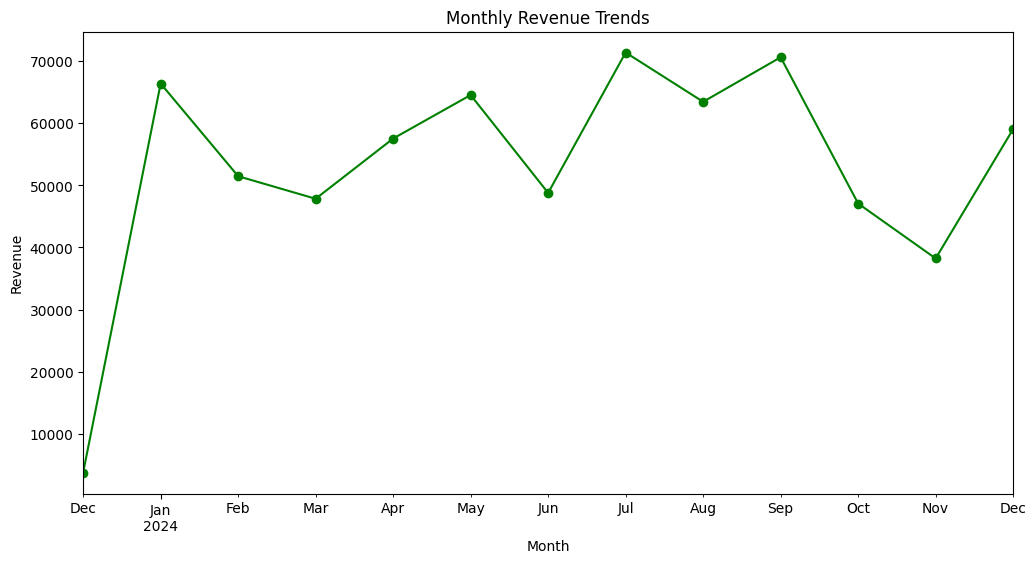

In [63]:
#Monthly revenue trends:

transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('TransactionMonth')['TotalValue'].sum()

monthly_revenue.plot(kind='line', figsize=(12, 6), marker='o', color='green')
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


## Business Insghts:
#  1. Customer Demographics and Signup Trends:

A.South America has the highest number of customers compared to other regions.
  This indicates that South America is a key market for the business.

B.Most customers signed up during February, March, and April, whereas January
  consistently shows the lowest number of new signups.

# 2. Product Category and Pricing Trends:

A.Products across categories have almost equal distribution, with a slight dip
  in the Home Decor category. This might indicate either lower demand or limited product variety in this segment.

B.Price distribution highlights two key ranges: $100–$200 and $400–$500,  
  showing these are the most popular pricing brackets among customers.
# 3. Revenue and Customer Trends:

A.The total revenue generated is $689,995.56, with Customer ID: C0141 being    the top contributor, generating $10,673 in revenue.

B.The top-selling product is P059, sold 46 times, indicating strong demand for this product.
# 4. Monthly Revenue Trends:

A.In December 2023, revenue was critically low (below $1,000), but it showed a sharp recovery to over $6,000 in January 2024.

B.Post-recovery, the monthly revenue stabilized in the range of $5,000–$7,000 for the rest of the year, showing consistent performance after an initial spike.

# TASK 2 : Looklike Model

In [66]:
#import sklearn library
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler


In [67]:
# visit the Data:

print(customers.head())
print()
print(products.head())
print()
print(transactions.head())

  CustomerID        CustomerName         Region SignupDate SignupMonth
0      C0001    Lawrence Carroll  South America 2022-07-10     2022-07
1      C0002      Elizabeth Lutz           Asia 2022-02-13     2022-02
2      C0003      Michael Rivera  South America 2024-03-07     2024-03
3      C0004  Kathleen Rodriguez  South America 2022-10-09     2022-10
4      C0005         Laura Weber           Asia 2022-08-15     2022-08

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

  TransactionID CustomerID ProductID TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067      2024-08-25         1      300.68   
1        T00112      C0146      P067      2024-05-27         1      

In [69]:
# Merge 3 Dataset
# Merge transactions with products
transactions = transactions.merge(products, on='ProductID', how='left')

# Merge transactions with customers
data = transactions.merge(customers, on='CustomerID', how='left')

# Check the final dataset
data.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,TransactionMonth,ProductName_x,Category_x,Price_y,ProductName_y,Category_y,Price,CustomerName,Region,SignupDate,SignupMonth
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,2024-08,ComfortLiving Bluetooth Speaker,Electronics,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03,2022-12
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,2024-05,ComfortLiving Bluetooth Speaker,Electronics,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04,2024-09
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,2024-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04,2024-04
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,2024-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11,2024-04
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,2024-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15,2022-03


In [71]:
# Aggregate transaction data
customer_agg = data.groupby('CustomerID').agg({
    'TotalValue': 'sum','Quantity': 'sum','Price': 'mean'}).reset_index()

# Add region encoding
region_encoding = pd.get_dummies(customers[['CustomerID', 'Region']], columns=['Region'])
customer_agg = customer_agg.merge(region_encoding, on='CustomerID', how='left')

# Check aggregated features
customer_agg.head()


,CustomerID,TotalValue,Quantity,Price,Region_Asia,Region_Europe,Region_North America,Region_South America
0,C0001,3354.52,12,278.334000,False,False,False,True
1,C0002,1862.74,10,208.920000,True,False,False,False
2,C0003,2725.38,14,195.707500,False,False,False,True
3,C0004,5354.88,23,240.636250,False,False,False,True
4,C0005,2034.24,7,291.603333,True,False,False,False


### Normalize the Features

In [73]:
# Normalize numerical features
scaler = MinMaxScaler()
features = customer_agg.drop('CustomerID', axis=1)  # Exclude CustomerID for scaling
normalized_features = scaler.fit_transform(features)

# Convert back to DataFrame
normalized_features = pd.DataFrame(normalized_features, columns=features.columns, index=customer_agg['CustomerID'])
normalized_features.head()


,TotalValue,Quantity,Price,Region_Asia,Region_Europe,Region_North America,Region_South America
CustomerID,,,,,,,
C0001,0.308942,0.354839,0.519414,0.0,0.0,0.0,1.0
C0002,0.168095,0.290323,0.367384,1.0,0.0,0.0,0.0
C0003,0.249541,0.419355,0.338446,0.0,0.0,0.0,1.0
C0004,0.497806,0.709677,0.436848,0.0,0.0,0.0,1.0
C0005,0.184287,0.193548,0.548476,1.0,0.0,0.0,0.0


### Calculate similirity score (Build the lookalike model)

In [74]:
# Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(normalized_features)

# Convert to DataFrame for easy manipulation
similarity_df = pd.DataFrame(similarity_matrix, index=customer_agg['CustomerID'], columns=customer_agg['CustomerID'])
similarity_df.head()


CustomerID,C0001,C0002,C0003,C0004,C0005,C0006,C0007,C0008,C0009,C0010,...,C0191,C0192,C0193,C0194,C0195,C0196,C0197,C0198,C0199,C0200
CustomerID,,,,,,,,,,,,,,,,,,,,,
C0001,1.000000,0.253518,0.986950,0.959271,0.286969,0.995359,0.330221,0.348553,0.241389,0.224175,...,0.999278,0.989804,0.311436,0.328707,0.987495,0.401498,0.260083,0.204501,0.275672,0.371408
C0002,0.253518,1.000000,0.221730,0.289222,0.984924,0.277859,0.969086,0.272393,0.185625,0.178380,...,0.247901,0.224718,0.991865,0.253071,0.261385,0.304570,0.202207,0.156908,0.214053,0.963411
C0003,0.986950,0.221730,1.000000,0.968405,0.229577,0.968467,0.262941,0.326945,0.176962,0.211370,...,0.984116,0.970527,0.266518,0.292258,0.992322,0.328600,0.221515,0.152471,0.231575,0.327276
C0004,0.959271,0.289222,0.968405,1.000000,0.287091,0.953520,0.328818,0.447073,0.205789,0.284352,...,0.948407,0.910928,0.349082,0.392850,0.990059,0.425212,0.285915,0.180586,0.296433,0.439008
C0005,0.286969,0.984924,0.229577,0.287091,1.000000,0.322382,0.995295,0.274389,0.248972,0.179873,...,0.285261,0.271305,0.989771,0.273659,0.271186,0.363847,0.231976,0.207123,0.249600,0.958421


### Generate recoomendations

In [79]:
# Function to get top 3 lookalikes for each customer
def get_top_lookalikes(similarity_df, top_n=3):
    lookalike_list = []
    for customer_id in similarity_df.index:
        # Sort customers by similarity score, skip self (iloc[1:top_n+1])
        similar_customers = similarity_df.loc[customer_id].sort_values(ascending=False).iloc[1:top_n+1]
        # Add results to the list
        lookalike_list.append(
            [customer_id] + list(similar_customers.index) + list(similar_customers.values)
        )
    return lookalike_list

# Get top 3 lookalikes for all customers
lookalike_list = get_top_lookalikes(similarity_df)

# Convert the list into a DataFrame
lookalike_df = pd.DataFrame(
    lookalike_list,
    columns=['CustomerID', 'Lookalike1', 'Lookalike2', 'Lookalike3', 'Score1', 'Score2', 'Score3']
)

# Save the DataFrame as a CSV file
lookalike_df.to_csv('Lookalike.csv', index=False)

# Show the first few rows
lookalike_df.head()



,CustomerID,Lookalike1,Lookalike2,Lookalike3,Score1,Score2,Score3
0,C0001,C0137,C0191,C0011,0.999479,0.999278,0.999276
1,C0002,C0088,C0142,C0027,0.998965,0.998596,0.996510
2,C0003,C0190,C0147,C0174,0.998906,0.997914,0.996201
3,C0004,C0113,C0169,C0012,0.999112,0.995818,0.994859
4,C0005,C0186,C0140,C0146,0.998743,0.998450,0.996784


In [80]:
#Top 3 similar customers and their scores for all customers
lookalike_df.head(3)

,CustomerID,Lookalike1,Lookalike2,Lookalike3,Score1,Score2,Score3
0,C0001,C0137,C0191,C0011,0.999479,0.999278,0.999276
1,C0002,C0088,C0142,C0027,0.998965,0.998596,0.996510
2,C0003,C0190,C0147,C0174,0.998906,0.997914,0.996201


# Task 3: Customer Segmentation / Clustering

To group customers into segments based on their profiles and transaction history, enabling better targeting and personalized marketing.

In [81]:
# Merge Customers.csv and Transactions.csv
merged_df = pd.merge(transactions, customers, on='CustomerID', how='left')

# Aggregate transaction-level data for each customer
customer_agg = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Total revenue per customer
    'TransactionID': 'count',  # Total number of transactions
    'Quantity': 'mean',        # Average basket size
}).rename(columns={
    'TotalValue': 'TotalRevenue',
    'TransactionID': 'TotalTransactions',
    'Quantity': 'AvgBasketSize'
}).reset_index()

# Merge aggregated transaction data back to customer profile
customer_profile = pd.merge(customers, customer_agg, on='CustomerID', how='left')

# Fill any missing values (e.g., customers with no transactions)
customer_profile.fillna({
    'TotalRevenue': 0,
    'TotalTransactions': 0,
    'AvgBasketSize': 0
}, inplace=True)

# Convert SignupDate to a datetime object for tenure calculation
customer_profile['SignupDate'] = pd.to_datetime(customer_profile['SignupDate'])

# Calculate tenure in days since signup
current_date = pd.Timestamp.now()
customer_profile['TenureDays'] = (current_date - customer_profile['SignupDate']).dt.days

# Drop unneeded columns for clustering
customer_clustering_data = customer_profile.drop(['CustomerName', 'SignupDate'], axis=1)
customer_clustering_data.head()


,CustomerID,Region,SignupMonth,TotalRevenue,TotalTransactions,AvgBasketSize,TenureDays
0,C0001,South America,2022-07,3354.52,5.0,2.400000,932
1,C0002,Asia,2022-02,1862.74,4.0,2.500000,1079
2,C0003,South America,2024-03,2725.38,4.0,3.500000,326
3,C0004,South America,2022-10,5354.88,8.0,2.875000,841
4,C0005,Asia,2022-08,2034.24,3.0,2.333333,896


### Feature Scaling:

In [82]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for clustering
numeric_columns = ['TotalRevenue', 'TotalTransactions', 'AvgBasketSize', 'TenureDays']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_clustering_data[numeric_columns])

# Convert scaled data back to a DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)
scaled_df['CustomerID'] = customer_clustering_data['CustomerID']
scaled_df.head()


,TotalRevenue,TotalTransactions,AvgBasketSize,TenureDays,CustomerID
0,-0.051884,0.000000,-0.201382,1.152884,C0001
1,-0.862714,-0.451294,-0.030924,1.605593,C0002
2,-0.393842,-0.451294,1.673655,-0.713387,C0003
3,1.035375,1.353881,0.608293,0.872636,C0004
4,-0.769499,-0.902587,-0.315021,1.042017,C0005


## 1. K-Means Clustering:

### What is it?:
K-Means is a popular clustering algorithm that partitions data into K distinct clusters. Each customer is assigned to the cluster whose center (centroid) is nearest.

### Why use it?:
Easy to understand and implement.

Works well when clusters are spherical or circular and data is relatively well-separated.

Good for large datasets.



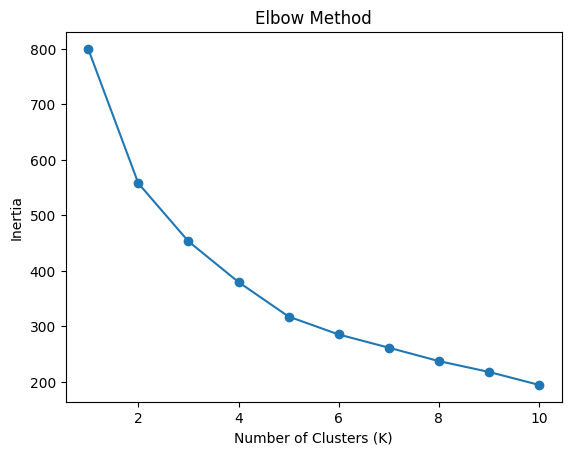

In [84]:
#Step 1: Elbow Method to Find Optimal K

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
inertia = []

# Try different values of K from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df[numeric_columns])  # Fit the KMeans model on the scaled data
    inertia.append(kmeans.inertia_)  # Store inertia (sum of squared distances to the nearest cluster center)

# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()



In [85]:
#Step 2: Apply K-Means with Chosen K:

# Apply K-Means clustering with K=4 (example)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(scaled_df[numeric_columns])

# Check the first few rows to see which customer belongs to which cluster
customer_profile.head()


,CustomerID,CustomerName,Region,SignupDate,SignupMonth,TotalRevenue,TotalTransactions,AvgBasketSize,TenureDays,Cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,2022-07,3354.52,5.0,2.400000,932,2
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022-02,1862.74,4.0,2.500000,1079,2
2,C0003,Michael Rivera,South America,2024-03-07,2024-03,2725.38,4.0,3.500000,326,2
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022-10,5354.88,8.0,2.875000,841,0
4,C0005,Laura Weber,Asia,2022-08-15,2022-08,2034.24,3.0,2.333333,896,2


In [88]:
#Step 3: Optional - Evaluate Clustering:

from sklearn.metrics import davies_bouldin_score

# Evaluate clustering quality
db_index = davies_bouldin_score(scaled_df[numeric_columns], customer_profile['Cluster'])
print('Davies-Bouldin Index:', db_index)


from sklearn.metrics import davies_bouldin_score

# Evaluate clustering quality
db_index = davies_bouldin_score(scaled_df[numeric_columns], customer_profile['Cluster'])
print('Davies-Bouldin Index:', db_index)


Davies-Bouldin Index: 1.215035501264994
Davies-Bouldin Index: 1.215035501264994


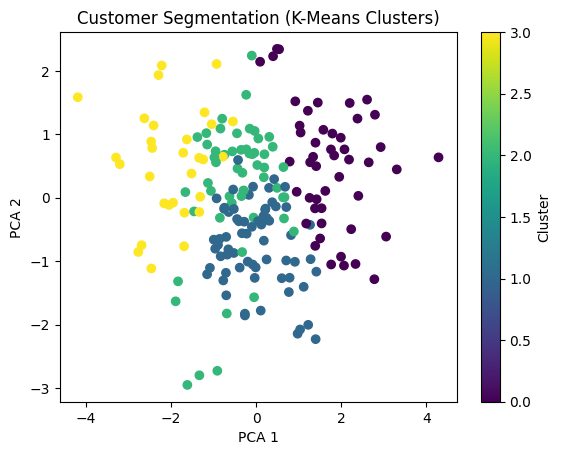

In [89]:
#Step 4: Optional - Visualize the Clusters

from sklearn.decomposition import PCA

# Reduce the features to 2D using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df[numeric_columns])

# Add PCA components to the DataFrame
customer_profile['PCA1'] = pca_components[:, 0]
customer_profile['PCA2'] = pca_components[:, 1]

# Plot the clusters
plt.scatter(customer_profile['PCA1'], customer_profile['PCA2'], c=customer_profile['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (K-Means Clusters)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [90]:
#Step 5: Analyze the Clusters:

# Group by clusters and calculate the average for each feature
cluster_summary = customer_profile.groupby('Cluster').agg({
    'TotalRevenue': 'mean',
    'TotalTransactions': 'mean',
    'AvgBasketSize': 'mean',
    'TenureDays': 'mean'
}).reset_index()

# Print the cluster summary
print(cluster_summary)


   Cluster  TotalRevenue  TotalTransactions  AvgBasketSize  TenureDays
0        0   5755.758125           7.708333       2.657543  709.958333
1        1   3476.467463           5.179104       2.505467  255.194030
2        2   2684.503091           3.709091       2.824545  775.872727
3        3   1104.939333           2.633333       1.761667  589.333333


In [91]:
#Step 6: Label the Clusters

# Create a new column for cluster labels based on the summary
def label_cluster(cluster_id):
    if cluster_id == 0:
        return 'High-Value, Frequent Shoppers'
    elif cluster_id == 1:
        return 'Moderate Shoppers'
    elif cluster_id == 2:
        return 'Loyal, Moderate Spenders'
    elif cluster_id == 3:
        return 'Low-Value, Infrequent Shoppers'

# Apply the label function to the Cluster column
customer_profile['ClusterLabel'] = customer_profile['Cluster'].apply(label_cluster)

# Check the updated customer profile
customer_profile.head()


,CustomerID,CustomerName,Region,SignupDate,SignupMonth,TotalRevenue,TotalTransactions,AvgBasketSize,TenureDays,Cluster,PCA1,PCA2,ClusterLabel
0,C0001,Lawrence Carroll,South America,2022-07-10,2022-07,3354.52,5.0,2.400000,932,2,-0.030995,1.051967,"Loyal, Moderate Spenders"
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022-02,1862.74,4.0,2.500000,1079,2,-0.794651,1.245640,"Loyal, Moderate Spenders"
2,C0003,Michael Rivera,South America,2024-03-07,2024-03,2725.38,4.0,3.500000,326,2,-0.045208,-1.567366,"Loyal, Moderate Spenders"
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022-10,5354.88,8.0,2.875000,841,0,1.835926,0.666021,"High-Value, Frequent Shoppers"
4,C0005,Laura Weber,Asia,2022-08-15,2022-08,2034.24,3.0,2.333333,896,2,-1.146858,0.838308,"Loyal, Moderate Spenders"


## Cluster:

### Cluster 0: High revenue, frequent transactions, and larger average basket size.

### Cluster 1: Moderate revenue, fewer transactions, shorter tenure.

### Cluster 2: Moderate revenue, larger basket size, longer tenure.

### Cluster 3: Low revenue, infrequent transactions, small basket size.

In [92]:
# Save the customer profile with cluster labels to a new CSV
customer_profile.to_csv('CustomerProfile_with_Clusters.csv', index=False)


## Evaluate the Clustering Performance:

In [93]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(scaled_df[numeric_columns], kmeans.labels_)
print("DB Index:", db_index)


DB Index: 1.215035501264994


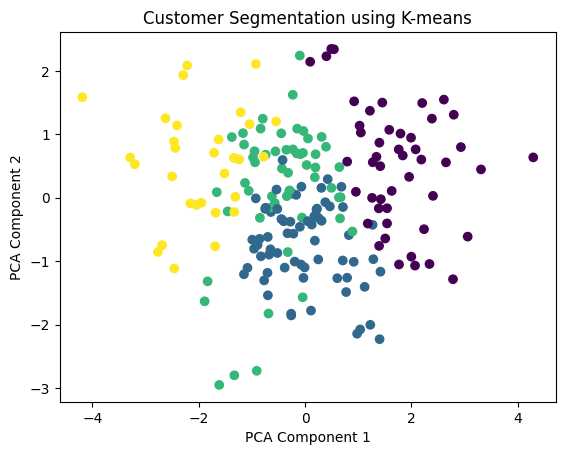

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df[numeric_columns])

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Customer Segmentation using K-means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## Predictive Model:

### 1.Target high-value customers (Cluster 0) with premium offers or loyalty programs.

### 2.Increase engagement with Cluster 1 by offering discounts or cross-selling opportunities.

### Re-engage dormant customers in Cluster 2 with reactivation campaigns.

### 3.Create awareness and provide offers to customers in Cluster 3 to increase their transaction frequency.

In [95]:
customer_profile['Cluster'] = kmeans.labels_
customer_profile.to_csv('Customer_Segmentation.csv', index=False)


'/content'